In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file
df = pd.read_csv('fight-songs.csv')


<Axes: xlabel='year', ylabel='bpm'>

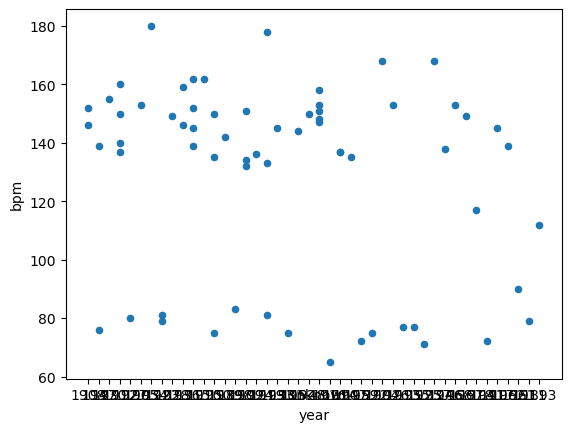

In [10]:
df.plot(kind='scatter',x='year', y='bpm' )


In [30]:
from sklearn.feature_selection import mutual_info_regression

# Convert 'Yes/No' to 1/0 for the calculation
# X = df[['fight', 'victory', 'rah', 'nonsense', 'colors', 'spelling', "nonsense","men", "opponents", "contest"]].replace({'Yes': 1, 'No': 0})

# #first test result: Importance of Tropes to BPM (Mutual Information):
# # men          0.110115
# # fight        0.067070
# # spelling     0.030340
# # victory      0.000000
# # rah          0.000000
# # nonsense     0.000000
# # colors       0.000000
# # nonsense     0.000000
# # opponents    0.000000
# # contest      0.000000

# y = df['bpm']

# mi_scores = mutual_info_regression(X, y)
# mi_results = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# print("Importance of Tropes to BPM (Mutual Information):")
# print(mi_results)

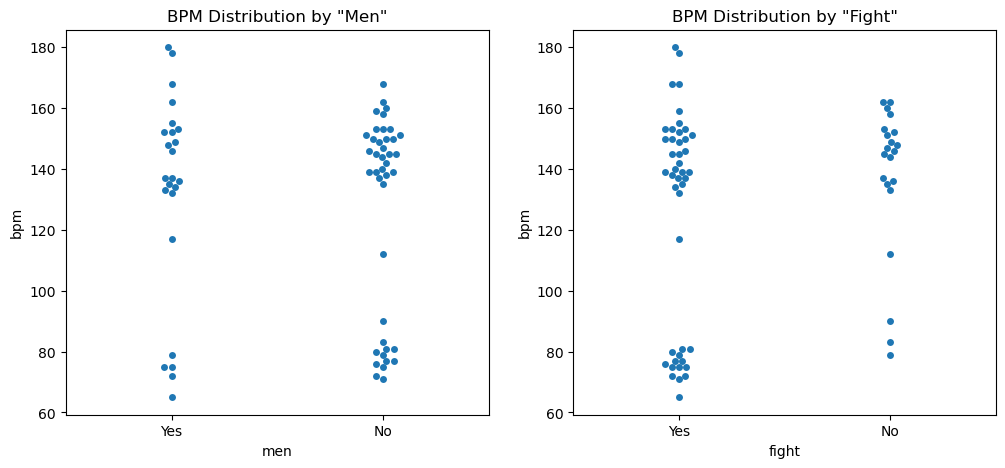

In [24]:
# two top contributors
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: How 'men' splits the BPM
sns.swarmplot(x='men', y='bpm', data=df, ax=axes[0])
axes[0].set_title('BPM Distribution by "Men"')

# Plot 2: How 'fight' splits the BPM
sns.swarmplot(x='fight', y='bpm', data=df, ax=axes[1])
axes[1].set_title('BPM Distribution by "Fight"')

plt.show()

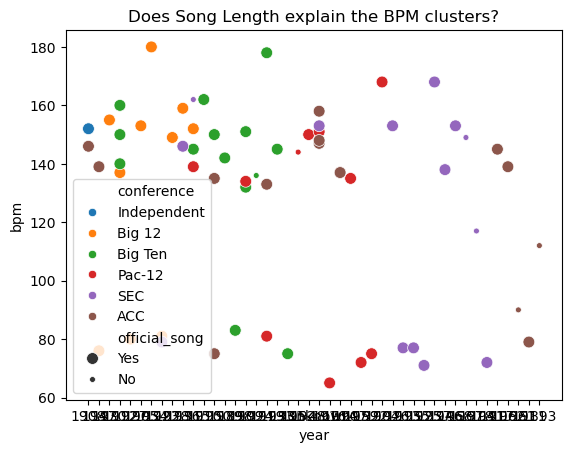

In [42]:
sns.scatterplot(data=df, x='year', y='bpm', hue='conference', size = "official_song")
plt.title('Does Song Length explain the BPM clusters?')
plt.show()

In [31]:
# Create a mask for Fast vs Slow
is_fast = df['bpm'] > 110
is_slow = df['bpm'] < 90

# 1. Overall Dataset Ratio
total_fast = is_fast.sum()
total_slow = is_slow.sum()
overall_ratio = total_fast / total_slow

# 2. Ratio by Conference
conf_counts = df.groupby('conference').apply(lambda x: (x['bpm'] > 110).sum() / (x['bpm'] < 90).sum())

print(f"Overall Dataset Ratio (Fast:Slow): {overall_ratio:.2f}:1")
print("\nRatio by Conference:")
print(conf_counts)

Overall Dataset Ratio (Fast:Slow): 3.00:1

Ratio by Conference:
conference
ACC            5.500000
Big 12         2.333333
Big Ten        6.000000
Independent         inf
Pac-12         2.000000
SEC            1.800000
dtype: float64


C:\Users\czzho\AppData\Local\Temp\ipykernel_34432\44536979.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  conf_counts = df.groupby('conference').apply(lambda x: (x['bpm'] > 110).sum() / (x['bpm'] < 90).sum())
C:\Users\czzho\AppData\Local\Temp\ipykernel_34432\44536979.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conf_counts = df.groupby('conference').apply(lambda x: (x['bpm'] > 110).sum() / (x['bpm'] < 90).sum())


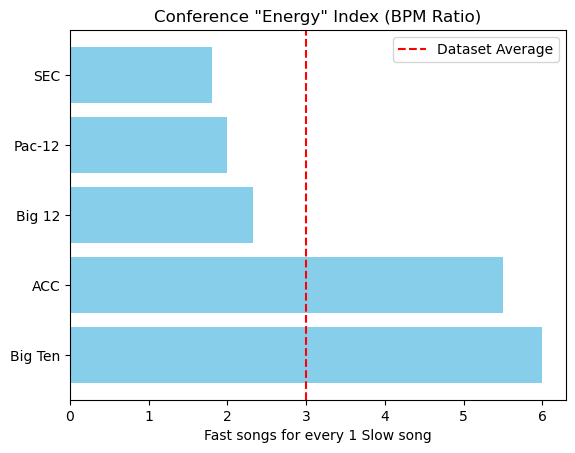

In [32]:
# Organizing the data from your results
conferences = ['Big Ten', 'ACC', 'Big 12', 'Pac-12', 'SEC']
fast_ratios = [6.0, 5.5, 2.33, 2.0, 1.8]

# Plotting the "Aggression" of each conference's tempo
plt.barh(conferences, fast_ratios, color='skyblue')
plt.xlabel('Fast songs for every 1 Slow song')
plt.title('Conference "Energy" Index (BPM Ratio)')
plt.axvline(3.0, color='red', linestyle='--', label='Dataset Average')
plt.legend()
plt.show()